In [1]:
import pandas as pd
from pathlib import Path
import numpy as np 
import seaborn as sns
sns.set()
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pickle

In [2]:
cities = pd.read_csv('data/cities_1.csv')

In [3]:
cities.head()

,SiteCity,TotalFirstYearGrosskWh,TotalFirstYearGrossTherm,TotalLifecycleGrosskWh,TotalLifecycleGrossTherm,Budget,Total Claims,Total Programs,% OBF Budget,% Resource Budget,city,dac_proportion,ces_score_median,ces_percentile_median,Total Tax Revenue,Average Tax Revenue,median_household_income_usd,total_population
0,ACAMPO,48664.726740,-148.890330,583976.720880,-1786.683960,17684.568509,6,1,0.000000,100.0,ACAMPO,0.00,21.531463,40.282507,NaN,NaN,83913.0,9814.0
1,ADELANTO,13576.844232,-30.037266,67884.221160,-150.186330,27320.063231,4,1,0.000000,100.0,ADELANTO,0.50,35.908799,68.451255,23628867.0,7.876289e+06,45695.5,35179.0
2,ALAMO,73049.392600,118.645240,684999.976290,-1279.097025,48785.542683,15,1,88.044896,100.0,ALAMO,0.00,2.175088,0.416194,NaN,NaN,219750.0,9373.0
3,ALBANY,153765.922000,-785.076334,842200.607400,-4288.070280,60926.193528,35,2,0.000000,100.0,ALBANY,0.00,8.128606,8.740068,57342690.0,1.911423e+07,102361.0,16742.0
4,ALHAMBRA,21630.949392,-32.172462,120233.350224,-178.879938,48465.447601,7,1,0.000000,100.0,ALHAMBRA,0.15,33.702151,66.143272,154981924.0,5.166064e+07,59206.0,84647.0


In [4]:
df = cities.dropna()
df.head()

,SiteCity,TotalFirstYearGrosskWh,TotalFirstYearGrossTherm,TotalLifecycleGrosskWh,TotalLifecycleGrossTherm,Budget,Total Claims,Total Programs,% OBF Budget,% Resource Budget,city,dac_proportion,ces_score_median,ces_percentile_median,Total Tax Revenue,Average Tax Revenue,median_household_income_usd,total_population
1,ADELANTO,13576.844232,-30.037266,6.788422e+04,-150.186330,27320.063231,4,1,0.0,100.0,ADELANTO,0.500000,35.908799,68.451255,2.362887e+07,7.876289e+06,45695.5,35179.0
3,ALBANY,153765.922000,-785.076334,8.422006e+05,-4288.070280,60926.193528,35,2,0.0,100.0,ALBANY,0.000000,8.128606,8.740068,5.734269e+07,1.911423e+07,102361.0,16742.0
4,ALHAMBRA,21630.949392,-32.172462,1.202334e+05,-178.879938,48465.447601,7,1,0.0,100.0,ALHAMBRA,0.150000,33.702151,66.143272,1.549819e+08,5.166064e+07,59206.0,84647.0
7,AMERICAN CANYON,246321.568960,-390.571830,2.569735e+06,-3193.530636,113629.615697,737,2,0.0,100.0,AMERICAN CANYON,0.000000,14.583999,24.013116,6.833698e+07,2.277899e+07,104042.0,13352.0
8,ANAHEIM,2843.648112,-1.635315,1.430267e+04,-8.226646,4105.068431,3,1,0.0,100.0,ANAHEIM,0.366667,34.963112,68.356665,1.004225e+09,3.347418e+08,66446.0,347532.0


In [5]:
df.corr()

,TotalFirstYearGrosskWh,TotalFirstYearGrossTherm,TotalLifecycleGrosskWh,TotalLifecycleGrossTherm,Budget,Total Claims,Total Programs,% OBF Budget,% Resource Budget,dac_proportion,ces_score_median,ces_percentile_median,Total Tax Revenue,Average Tax Revenue,median_household_income_usd,total_population
TotalFirstYearGrosskWh,1.000000,-0.792565,0.989145,-0.729978,0.596338,0.682418,0.232121,0.067160,-0.134280,0.015434,0.042664,0.055911,0.386198,0.386198,-0.013893,0.395734
TotalFirstYearGrossTherm,-0.792565,1.000000,-0.743075,0.974103,-0.549007,-0.566494,-0.213795,0.014894,0.140708,0.036018,0.012302,0.000878,-0.355335,-0.355335,0.004548,-0.296456
TotalLifecycleGrosskWh,0.989145,-0.743075,1.000000,-0.684951,0.553940,0.691831,0.214841,0.061750,-0.114680,0.025675,0.054710,0.068066,0.348108,0.348108,-0.028162,0.376314
TotalLifecycleGrossTherm,-0.729978,0.974103,-0.684951,1.000000,-0.508393,-0.541302,-0.204608,0.010421,0.134233,0.013739,-0.003501,-0.011269,-0.327719,-0.327719,0.008245,-0.268342
Budget,0.596338,-0.549007,0.553940,-0.508393,1.000000,0.250493,0.453859,-0.015819,-0.713288,0.001086,-0.005024,-0.001563,0.753706,0.753706,0.009906,0.586662
Total Claims,0.682418,-0.566494,0.691831,-0.541302,0.250493,1.000000,0.170582,0.039468,-0.000718,0.010008,0.012251,0.018613,0.098510,0.098510,0.019887,0.219251
Total Programs,0.232121,-0.213795,0.214841,-0.204608,0.453859,0.170582,1.000000,-0.060667,-0.769748,0.065528,0.071303,0.072494,0.629761,0.629761,-0.060155,0.614847
% OBF Budget,0.067160,0.014894,0.061750,0.010421,-0.015819,0.039468,-0.060667,1.000000,0.071216,0.061472,0.038531,0.033144,-0.034485,-0.034485,0.099429,-0.013754
% Resource Budget,-0.134280,0.140708,-0.114680,0.134233,-0.713288,-0.000718,-0.769748,0.071216,1.000000,-0.052655,-0.044953,-0.043693,-0.766979,-0.766979,0.036945,-0.737241
dac_proportion,0.015434,0.036018,0.025675,0.013739,0.001086,0.010008,0.065528,0.061472,-0.052655,1.000000,0.854757,0.795665,0.039848,0.039848,-0.455345,0.095245


In [6]:
df[['Total Tax Revenue', 'total_population']].corr()

,Total Tax Revenue,total_population
Total Tax Revenue,1.000000,0.835188
total_population,0.835188,1.000000


In [27]:
def run_a_regression_on(X, Y):
    
    #creating space to save regressions
    
    foldername = input('Create a name for this regression: ')
    folder = input('What folder should it live in? ')
    Path('regressions/' + folder +'/'+ foldername).mkdir(parents = True, exist_ok = True )
    
    #actual regression
    
    X = sm.add_constant(X)
    model = sm.OLS(Y,X).fit()
    
    #saving regression summary
    #this is from stackoverflow
    
    plt.rc('figure', figsize=(12, 7))
    plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('regressions/' + folder + '/' + foldername + '/summary_' +foldername+ '.png') 
    
    #saving regression plot
   
    if len(X.columns)%2 == 1:
        m = (len(X.columns)-1)/2
    else:
        m = (len(X.columns)-2)/2
    
    fig = plt.figure(figsize=(12, 5+m*20/4.5))
    sm.graphics.plot_partregress_grid(model, fig=fig)
    plt.savefig('regressions/' + folder + '/' + foldername + '/graph_' +foldername+ '.png')
    
    print('Congratulations! The regression results are saved!')
    
    return

In [8]:
df.columns

Index(['SiteCity', 'TotalFirstYearGrosskWh', 'TotalFirstYearGrossTherm',
       'TotalLifecycleGrosskWh', 'TotalLifecycleGrossTherm', 'Budget',
       'Total Claims', 'Total Programs', '% OBF Budget', '% Resource Budget',
       'city', 'dac_proportion', 'ces_score_median', 'ces_percentile_median',
       'Total Tax Revenue', 'Average Tax Revenue',
       'median_household_income_usd', 'total_population'],
      dtype='object')

## My function only works for single variable regressions now, idk why, so need to fix it

## I'm just going to go ahead and run those single variable regressions.... I have close to zero stats knowledge, so I think that whatever I do will be corrected by Atherv, so it does not need to be perfect by any means.... Atherv is now the stats guy

In [30]:
Y = df[['Budget']] #,'TotalFirstYearGrosskWh', 'TotalFirstYearGrossTherm']]
X = df[['dac_proportion', 'ces_score_median', 'ces_percentile_median',
       'Total Tax Revenue', 'Average Tax Revenue',
        'median_household_income_usd', 'total_population',
        'Total Claims', 'Total Programs', '% OBF Budget', '% Resource Budget']]


Create a name for this regression:  budget_all
What folder should it live in?  cities_1


Congratulations! The regression results are saved!


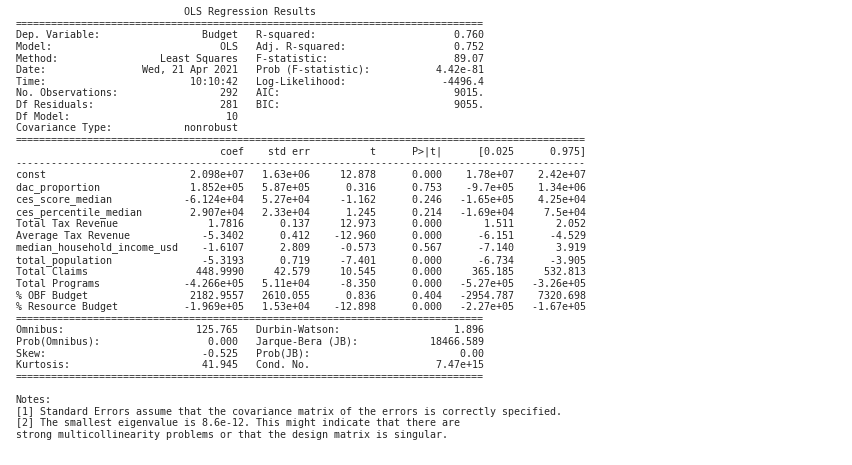

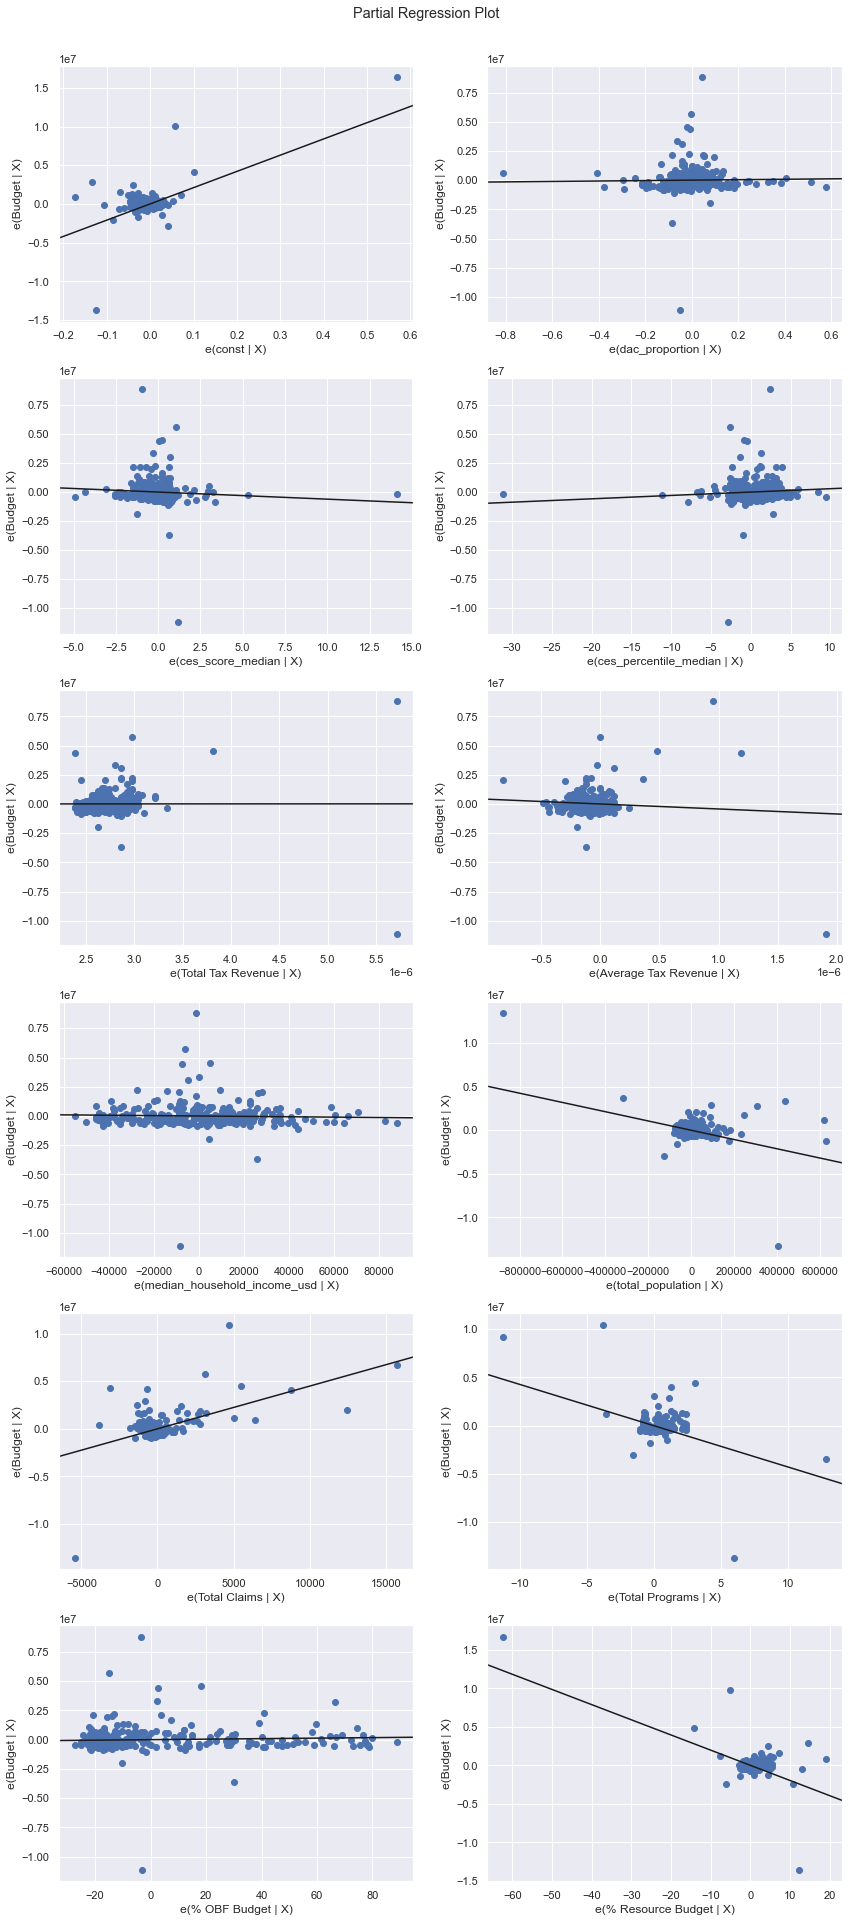

In [31]:
run_a_regression_on(
        X,
        Y
        )

Create a name for this regression:  budget_pop
What folder should it live in?  cities_1


Congratulations! The regression results are saved!


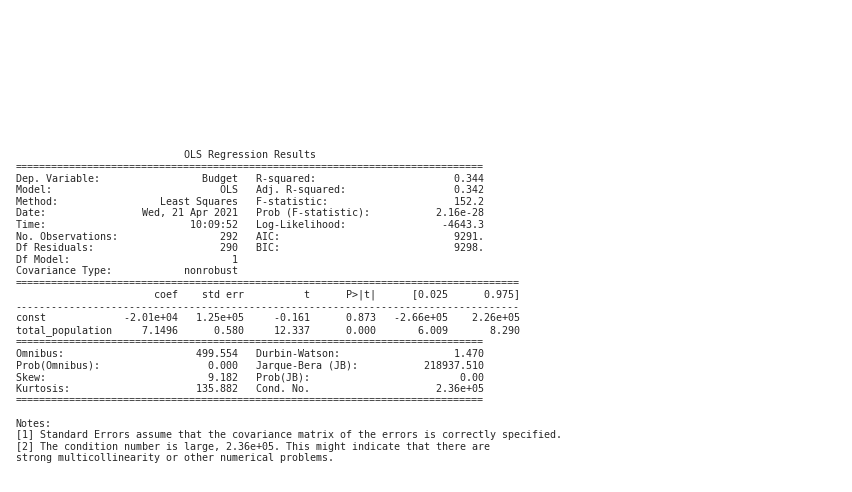

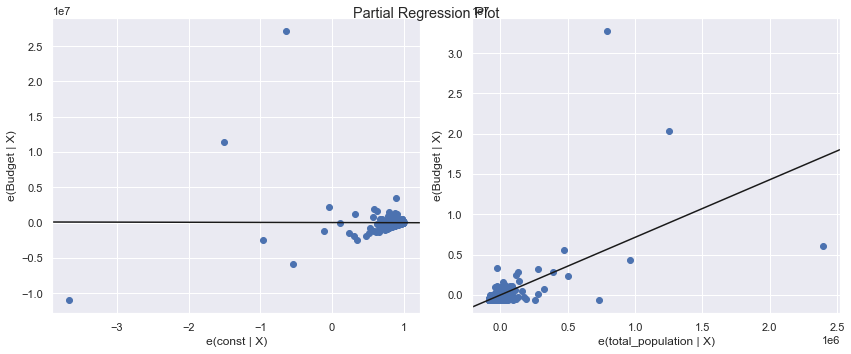

In [28]:
run_a_regression_on(df[['total_population']], df[['Budget']])

In [25]:
2%2

0

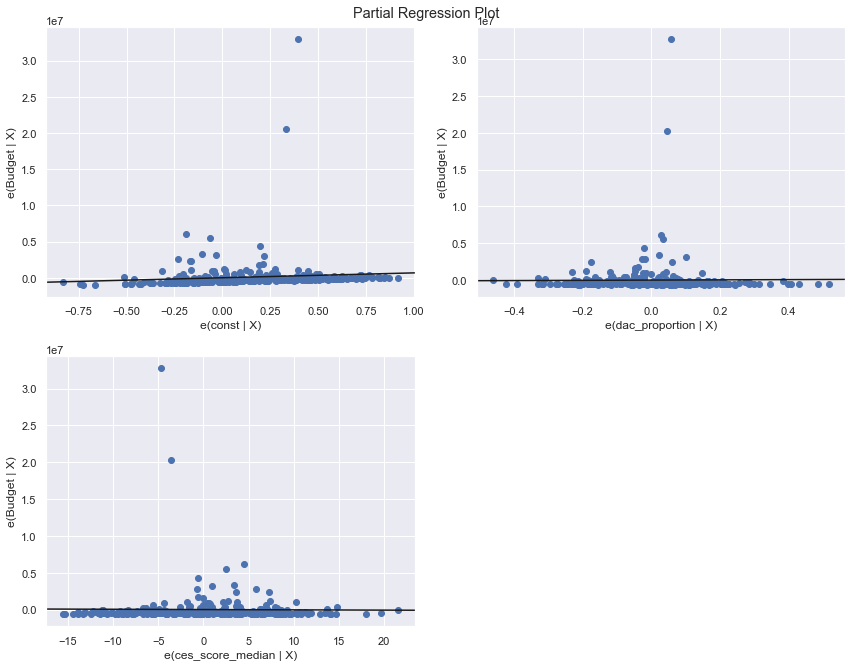

In [11]:
Y = df[['Budget']] #,'TotalFirstYearGrosskWh', 'TotalFirstYearGrossTherm']]
X = df[['dac_proportion','ces_score_median']]

X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()


fig = plt.figure(figsize=(12, 5+(20/4.5)))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.show()

# Create regression function that goes through every possible combination of variables??

In [38]:
import math

In [32]:
df.columns

Index(['SiteCity', 'TotalFirstYearGrosskWh', 'TotalFirstYearGrossTherm',
       'TotalLifecycleGrosskWh', 'TotalLifecycleGrossTherm', 'Budget',
       'Total Claims', 'Total Programs', '% OBF Budget', '% Resource Budget',
       'city', 'dac_proportion', 'ces_score_median', 'ces_percentile_median',
       'Total Tax Revenue', 'Average Tax Revenue',
       'median_household_income_usd', 'total_population'],
      dtype='object')

In [34]:
# max independent variables
x = ['Total Claims', 'Total Programs', '% OBF Budget', '% Resource Budget','dac_proportion', 'ces_score_median', 'ces_percentile_median',
       'Total Tax Revenue', 'Average Tax Revenue',
       'median_household_income_usd', 'total_population']

print('There are maximum ' + str(len(x)) + ' independent variables')

# max dependent variables
y = ['TotalFirstYearGrosskWh', 'TotalFirstYearGrossTherm',
       'TotalLifecycleGrosskWh', 'TotalLifecycleGrossTherm', 'Budget']

print('There are maximum ' + str(len(y)) + ' dependent variables')


There are maximum 11 independent variables
There are maximum 5 dependent variables


In [40]:
math.factorial(11)*5

199584000

### Since my regression function only looks at one dependent variable at a time, there would be 199584000 possible different regressions run if I made a function to do so. For our puposes, I think that is too many hehe also a lot of those may be useless from a stats analysis point of view, which I do not have. So, I'm not going to make that function although it would be fun

In [41]:
print(x)
print(y)

['Total Claims', 'Total Programs', '% OBF Budget', '% Resource Budget', 'dac_proportion', 'ces_score_median', 'ces_percentile_median', 'Total Tax Revenue', 'Average Tax Revenue', 'median_household_income_usd', 'total_population']
['TotalFirstYearGrosskWh', 'TotalFirstYearGrossTherm', 'TotalLifecycleGrosskWh', 'TotalLifecycleGrossTherm', 'Budget']


Create a name for this regression:  budget_obf
What folder should it live in?  cities_1


Congratulations! The regression results are saved!


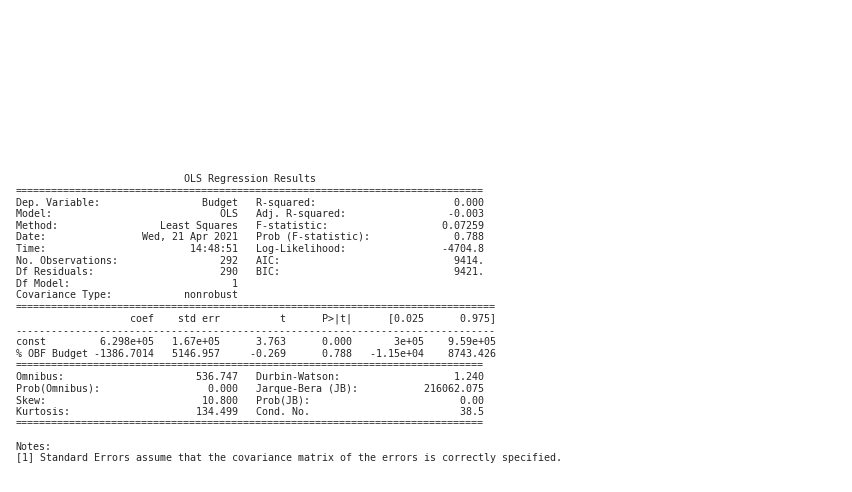

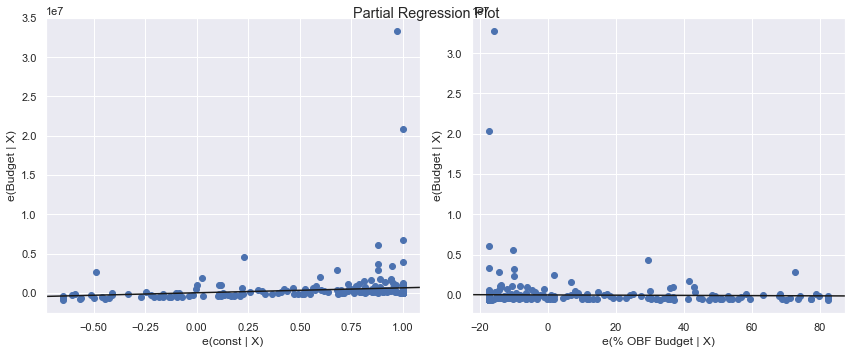

In [52]:
run_a_regression_on(df[['% OBF Budget']],
                   df[['Budget']])

In [53]:
df['% OBF Budget'].value_counts()

0.000000      142
100.000000      4
2.286542        1
5.791245        1
60.498231       1
             ... 
7.372682        1
16.264974       1
7.430533        1
94.810740       1
3.752407        1
Name: % OBF Budget, Length: 148, dtype: int64

In [60]:
cities['Total Tax Revenue'].value_counts(dropna=False)

NaN            243
16787161.0       1
304222431.0      1
1126945.0        1
77629687.0       1
              ... 
162340118.0      1
83965540.0       1
193391526.0      1
134378568.0      1
89577373.0       1
Name: Total Tax Revenue, Length: 294, dtype: int64

In [61]:
df.shape

(292, 18)

In [62]:
cities.shape

(536, 18)